# Car Accident Severity

## Business Understanding

### A description of the problem and a discussion of the background.


A number of factors contribute to the risk of collisions, in the majority of the cases is related to driver factors, road and weather conditions. Traffic collisions often result in injury, disability, death, property damage, financial costs as well as terrible traffic jams.

In an effort to avoid and reduce the frequency of these type of accidents, I will build a model to predict the severity of an accident given the weather and the road conditions. This way we would be able to bring awareness to the drivers and warn people about the possibility of getting into a car accident and its severity if it happens. This way people would drive more carefully or even change the travel if able to.

The big question to be answered is: Knowing the weather and road conditions, how severe would be the accident if it happens?

## Data Understanding

### A description of the data and how it will be used to solve the problem.

The raw data we will use is provided by the SDOT Traffic Management Division and contains data of all types of collisions that happened in Seattle city from 2004 to May/2020.

The data contains 194,673 samples and have 37 features that covers the weather and road conditions, collision factors and fatality.

Let's have a look on the data and understand better how to find the answer to this problem.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

path = "Data-Collisions.csv"
df = pd.read_csv(path)

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
print('Samples:', df.shape[0])
print('Features:', df.shape[1])

Samples: 194673
Features: 38


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


### Missing values

In [5]:
df.isna().sum().to_frame().rename(columns={0:'Nan Count'})

,Nan Count
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


There are missing values on part of the data, some features have over 40% of missing data for that I'll not consider them to my model. Removing the irrelevant data attributes away, the variables I will use to classify the severity of the accidents are:

COLLISIONTYPE: Collision type

WEATHER: Weather conditions during the time of the collision.

ROADCOND: The condition of the road during the collision.

LIGHTCOND: The light conditions during the collision.

UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.

These features contains missing values but its below 3% of the total amount of samples.

### What is our target variable?

Our target variable SEVERITYCODE that corresponds to the severity of the collision:


1: Property Damage only collision which is the same as Not injured coliision

2: Injury collision By looking to the target variable I know it's a binary classification problem.

In [6]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [7]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

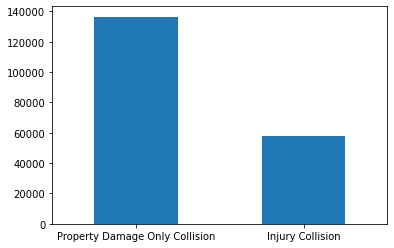

In [8]:
df['SEVERITYDESC'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

### Annual amount of traffic incidents in Seattle

We notice there is a considerably high amount of incidents only discrepancy is from 2020 as it was recorded incidents that occured till May/2020 not a whole year like the others. We can also infer from the plots that no injury collisions are always more likely to happen.

Text(0.5, 1.0, 'Annual traffic incidents in Seattle by Severity')

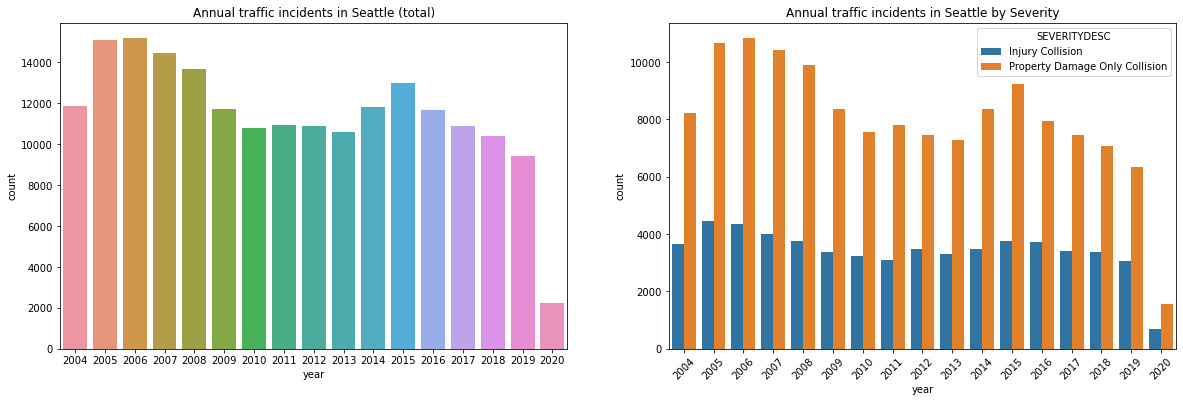

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df['year'].value_counts().sort_index()#.plot(kind='bar')
sns.countplot(x="year", data=df, ax=ax1)
sns.countplot(x="year", hue="SEVERITYDESC", data=df, ax=ax2)
plt.xticks(rotation=45)
ax1.set_title('Annual traffic incidents in Seattle (total)')
ax2.set_title('Annual traffic incidents in Seattle by Severity')

### Collision types

There is a considerable difference on the collision occurences according to collision types. Being the most recurrent accidents with parked cars,angles and rear ended.

In [10]:
df['COLLISIONTYPE'].value_counts().sort_values(ascending=False).to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


Text(0.5, 1.0, 'Collision Type Occurance')

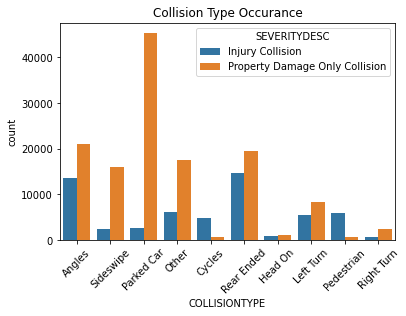

In [11]:
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)
plt.title('Collision Type Occurance')

### Weather condition

Considering Seattle weather conditions, we notice most incidents happened in a Clear weather. That could be because drivers are less careful when there is no harsh weather condition. It would be interesting to check the correlation between WEATHER and INATTENTIONIND(whether or not collision was due to inattention), but there are too many missing values, 85% of the data is missing.

In [12]:
df['WEATHER'].value_counts().sort_values(ascending=False).to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

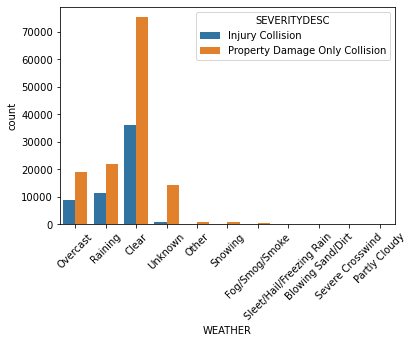

In [13]:
sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

### The condition of the road during the collision

More occurences in normal road conditions.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

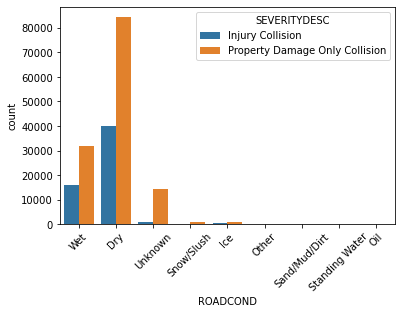

In [14]:
sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

### The light conditions during the collision

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

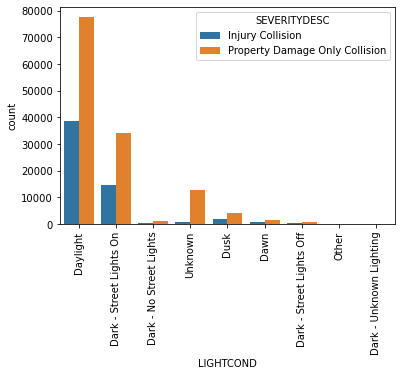

In [15]:
sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=90)

### Driver under influence of drugs or alcohol

In most incidents drivers were not under any influence.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

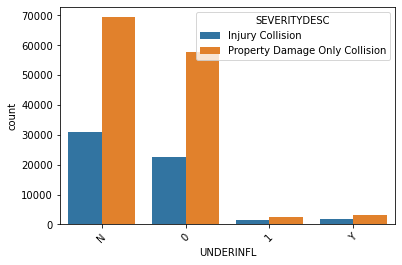

In [16]:
sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

Each feature have a different weight of influence on the severity of the collision. Overall, all of them are consistently infering that no-injury accidents in normal driving conditions are more recurrent.


We will use COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL as attributes to classify SEVERITYCODE. For that we will need to prepare this features so it is suitable for a binary classification model. I'll use some popular machine learning algorithms (SVM, Logistic Regression, Naive Bayes and KNN) build up models to analyze their performance and predict the collision severity.

## Methodology
### 1. Data preparation and cleaning
Data cleaning procedure to make the dataset readable and suitable to the machine learning algorithms.

Dropping all the irrelevant variables and attributes
Out of the 37 attributes, I will not consider the features with over 40% of missing data, other unclear and irrelevant/noisy variables to our problem. I'll use COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL as attributes to classify SEVERITYCODE.

Dealing with missing values
As my chosen attributes have about 3% of missing data I'll just drop them. I'll still have a considerable amount of data.

Treating the categorical variables
In my case, all attributes are categorical. In this step, I will apply label encoding technique for all of them.

Train/Test split and data normalization
Now that I treated all my variables I'll separate my independent variables to dataset A and dependent variable 'SEVERITYCODE' to dataset B. After, I'll use this data to randomly pick samples and split in this ratio:

70% to train my model
30% to test my model Following the split I'll normalize all data to make sure my features are on a similar scale.
### 2. Classification: Modeling and Evaluation
The prepared dataset will be used to model 3 classification models.

Logistic Regression: Classifies data by estimating the probability of classes.
Decision Tree: Classifies by breaking down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.
KNN: Classifies unseen data through the majority of its 'neighbours'. In this case we already know K=2 (2 classes of SEVERITY CODES). After obtaining each model's predictions we will evaluate their accuracy, precison, f1-score, log-loss and compare and discuss the results.
### 3. Discussion and Conclusion
After obtaining the results and evaluating them, in this section I will brief any observations noted based on the results. Finally, will conclude the results of this analysis.



- -  - - - - - - - - 

## 1. Data preparation and cleaning

### Dropping all the irrelevant variables and attributes and dealing with missing values.

In [17]:
data = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE']]
data = data.dropna()
data.shape

(189316, 6)

In [18]:
data.head(10)

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SEVERITYCODE
0,Angles,Overcast,Wet,Daylight,N,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,0,1
2,Parked Car,Overcast,Dry,Daylight,0,1
3,Other,Clear,Dry,Daylight,N,1
4,Angles,Raining,Wet,Daylight,0,2
5,Angles,Clear,Dry,Daylight,N,1
6,Angles,Raining,Wet,Daylight,0,1
7,Cycles,Clear,Dry,Daylight,N,2
8,Parked Car,Clear,Dry,Daylight,0,1
9,Angles,Clear,Dry,Daylight,0,2


In [19]:
data.dtypes

COLLISIONTYPE    object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
SEVERITYCODE      int64
dtype: object

In [20]:
data['UNDERINFL'].replace(to_replace=['N','Y','0'], value=[0,1,0],inplace=True)
data['UNDERINFL'].value_counts()

0    180219
1      9097
Name: UNDERINFL, dtype: int64

### Use label encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [21]:
from sklearn.preprocessing import LabelEncoder

features = data[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL']]

for feature in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features.head()

<ipython-input-21-7b78b63f3909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = features[feature].astype('|S')
<ipython-input-21-7b78b63f3909>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = LabelEncoder().fit_transform(features[feature])


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,4,8,5,0
1,9,6,8,2,0
2,5,4,0,5,0
3,4,1,0,5,0
4,0,6,8,5,0


In [22]:
X = features
y = data['SEVERITYCODE'].values

### Train/Test split and data normalization

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
109717,0,1,0,5,0
9615,7,1,0,5,0
133991,3,1,0,5,0
76012,5,1,0,5,0
97913,9,10,7,8,0


In [24]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]
X_test[0:5]

array([[ 0.90028023, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559],
       [ 0.18231884, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [ 0.90028023,  0.32670431, -0.71028447,  0.93363748, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559]])

## 2. Classification: Modeling and Evaluation

### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.0001, solver='liblinear')
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.0001, solver='liblinear')

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_tree.fit(X_train, y_train)
model_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Model Evaluation using Test set

In [28]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
# KNN
yhat = model_knn.predict(X_test)
yhat_knn = yhat
print("Train set KNN Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(y_test, yhat))
jaccard = jaccard_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(jaccard,2), round(f1_score_knn,2), round(precision_knn,2)]

# Decission tree 
yhat = model_tree.predict(X_test)
yhat_tree = yhat
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(y_train, model_tree.predict(X_train)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat))
jaccard = jaccard_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(jaccard,2), round(f1_score_tree,2), round(precision_tree,2)]

# Logistic regression
yhat_proba = model_lr.predict_proba(X_test)
yhat = model_lr.predict(X_test)
yhat_lr = yhat
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y_train, model_lr.predict(X_train)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat))
jaccard = jaccard_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(jaccard,2), round(f1_score_lr,2), round(precision_lr,2)]

Train set KNN Accuracy:  0.7111778510575683
Test set KNN Accuracy:  0.7363676379963024
Train set Decission Tree Accuracy:  0.7479191977120607
Test set Decission Tree Accuracy:  0.7483581301170877
Train set Logistic regression Accuracy:  0.6989156435583794
Test set Logistic regression Accuracy:  0.6997799102033629


In [29]:
report = pd.DataFrame(data=np.array([knn_report, tree_report, lr_report]), 
                      columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
report

,Algorithm,Jaccard,F1-score,Precision
0,KNN,0.72,0.67,0.74
1,Decision Tree,0.73,0.69,0.78
2,Logistic Regression,0.7,0.58,0.68


For all three models Jaccard score, which measures accuracy is above 70%. With a 5% better accuracy the highest accuracy model is the Decision Tree Classifier. The same model also presents the best F1_score and Recall(True positive rate).

In [30]:
from sklearn.metrics import confusion_matrix

print('KNN Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_knn).ravel()
(tn, fp, fn, tp)

KNN Confusion Matrix


(38708, 999, 13974, 3114)

In [31]:
print('Decision Tree Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_tree).ravel()
(tn, fp, fn, tp)

Decision Tree Confusion Matrix


(39170, 537, 13755, 3333)

In [32]:
print('Logistic Regression Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_lr).ravel()
(tn, fp, fn, tp)

Logistic Regression Confusion Matrix


(39655, 52, 16999, 89)

From the Confusion Matrixes we can see also exactly the amount of samples that were classified rightfully and wrongfully. Its noticable the variation jump that happens when comparing false positives and true positives while true negatives and false negatives are quite stable.


## 3. Discussion and Conclusion
In this analysis we evaluated the performance of 3 machine learning algorithms on the Seattle Collision dataset to predict the severity of an accident knowing the weather and road conditions.

The three models performed very similary, but Decision Tree stood out with a difference of 1% compared to KNN and 5% compared to Logistic Regression when we evaluate with the model's accuracy.


Althought I hand picked just 5 features out of 37, it showned to be a reasonable choice to find the answer we were searcing for. But there is always room for improvement! In a future analysis I could investigate further the remaining features and the features chosen for this analysis to make sophisticated new features and extract information that could possibly contribute to my model. Also, I could think further the classification behavior specifically with true/false positives and understand better what my model is missing. Much more could be done, as use hyperparametrization to set my model better.